In [1]:
import numpy as np
import pandas as pd
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [8]:
data_df = df.loc[:, 'gene_0':'gene_80']

In [9]:
data_df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_71,gene_72,gene_73,gene_74,gene_75,gene_76,gene_77,gene_78,gene_79,gene_80
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,7.377931,4.511449,8.727812,0.000000,7.377931,5.574656,3.188164,10.685783,8.434069,10.825428
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.312113,4.516185,8.759459,0.587845,6.361812,1.813607,0.323658,9.698158,9.144467,10.377004
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,1.683023,1.306846,10.006130,0.452595,2.533663,3.403377,0.000000,10.924182,7.860553,8.392150
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,4.949633,2.058697,9.297597,3.184471,6.892998,4.847566,0.000000,10.265416,8.721417,10.381089
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.133921,4.056150,9.438910,1.831269,4.304657,4.104630,2.396187,8.063196,8.039462,9.519909


In [10]:
from sklearn.decomposition import PCA


In [15]:
!ls

data.csv			labels.csv	      Untitled.ipynb
idea2_lowcomp_comparison.ipynb	Modified_idea1.ipynb


In [21]:
df_lebl = pd.read_csv('labels.csv')
df_lebl.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [22]:
df_lebl.Class.value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [23]:
z = {'BRCA' : 0 ,'KIRC' : 1,'LUAD' : 2,'PRAD' : 3,'COAD' : 4}
df_lebl['Class'] = df_lebl.Class.map(z)

In [24]:
df_lebl.head()

,Unnamed: 0,Class
0,sample_0,3
1,sample_1,2
2,sample_2,3
3,sample_3,3
4,sample_4,0


In [28]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
#################  PCA Plot of actual labels #######################

In [29]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_df.values)

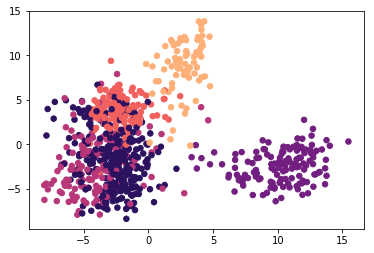

In [33]:
    plt.scatter(x = pca_result[:,0], y = pca_result[:,1],
        c=df_lebl.Class,
        cmap=ListedColormap(sns.color_palette('magma', n_colors=5).as_hex()),
        s=30)

In [82]:
#################  TSNE Plot of actual labels #######################

In [79]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
points = tsne.fit_transform(data_df.values)

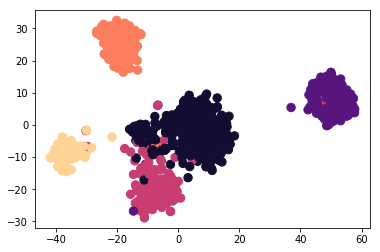

In [81]:
plt.scatter(x = points[:, 0], y = points[:, 1],
        c=df_lebl.Class,
        cmap=ListedColormap(sns.color_palette('magma', n_colors=10).as_hex()),
        s=70)

In [34]:
data_df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_71,gene_72,gene_73,gene_74,gene_75,gene_76,gene_77,gene_78,gene_79,gene_80
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,7.377931,4.511449,8.727812,0.000000,7.377931,5.574656,3.188164,10.685783,8.434069,10.825428
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.312113,4.516185,8.759459,0.587845,6.361812,1.813607,0.323658,9.698158,9.144467,10.377004
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,1.683023,1.306846,10.006130,0.452595,2.533663,3.403377,0.000000,10.924182,7.860553,8.392150
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,4.949633,2.058697,9.297597,3.184471,6.892998,4.847566,0.000000,10.265416,8.721417,10.381089
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.133921,4.056150,9.438910,1.831269,4.304657,4.104630,2.396187,8.063196,8.039462,9.519909


In [38]:
###########idae1##################

In [39]:
#Returns a Vector from a list

class Vector(object):

    def __init__(self, components):
        if not isinstance(components, tuple) and not isinstance(components, list):
            raise ValueError("Components must be a tuple or list.")
        if len(components) == 0:
            raise ValueError("Components must be at least 1-dimensional.")
        self.dimensions = len(components)
        self.components = components

    def __getitem__(self, key):
        return self.components[key]

    def __str__(self):
        return self.components.__str__()

    def __len__(self):
        return self.dimensions

In [40]:
# Measures square of euclidian distance for a nD vector

def cheap_dist(v1, v2):
    comps1 = v1.components
    comps2 = v2.components
    max_dimensions = max(v1.dimensions, v2.dimensions)
    dist = 0.0
    for i in range(0, max_dimensions):
        dist += math.pow(v1[i]-v2[i] , 2)
    return dist

In [41]:
# Measures euclidian distance for a nD vector

def dist(v1, v2):
    return math.sqrt(cheap_dist(v1,v2))

In [44]:
data_df.values[0]

array([ 0.        ,  2.01720929,  3.26552691,  5.47848651, 10.43199896,
        0.        ,  7.17517526,  0.59187087,  0.        ,  0.        ,
        0.59187087,  1.33428223,  2.01539052,  0.59187087,  0.        ,
        0.        ,  0.        ,  0.        ,  0.59187087,  5.61999396,
        1.33428223,  0.        ,  9.79608829,  0.        ,  0.        ,
        1.59865105,  7.21511554, 10.83906991,  6.62020369,  9.51353812,
        0.        ,  4.06365825,  7.76480526,  4.74765593, 13.71439579,
       10.03449636,  0.        ,  0.        ,  9.83345781,  0.        ,
       10.86126529,  0.        ,  0.        ,  0.59187087,  1.01027857,
        6.96284975, 10.95970496,  9.76950894, 12.24540415,  0.59187087,
        8.96882804, 10.17530004, 12.39906426,  8.47987725,  7.35576512,
        8.33105128, 10.64345939,  6.82122549, 10.63749433,  3.34039136,
        6.79226972,  1.01027857,  0.        ,  1.59865105,  7.99196394,
       10.42775281, 10.73430317,  3.47807874,  8.53811519,  3.92

In [45]:
#prepare the dataset

dataset = []
for i in range(len(data_df.values)):
    temp = []
    for x in data_df.values[i]:
        temp.append(float(x))
    vec = Vector(list(temp))
    dataset.append(vec)

In [52]:
import numpy as np
import pandas as pd
from csv import reader
import math
from math import floor
import random
from collections import defaultdict
import itertools

In [49]:
print("Number of genes = {}".format(len(dataset)))
print("Number of features = {}".format(len(dataset[0])))

Number of genes = 801
Number of features = 81


In [50]:
#Prepares the distance matrix :

def dist_matrix(points) : 
    n  = len(points)
    max_dist = 0.0
    min_dist = 10000000
    dist_mat = [[-1 for j in range(n)] for i in range(n)]
    for i in range(len(dist_mat)):
        for j in range (i+1,len(dist_mat)):
            dist_mat[i][j] = dist(points[i],points[j])
            if dist_mat[i][j] >= max_dist and dist_mat[i][j] > 0.0 :
                max_dist = dist_mat[i][j]
            elif dist_mat[i][j] <= min_dist :
                min_dist = dist_mat[i][j]
                
    return dist_mat,max_dist,min_dist
    
    

In [53]:
%%time
matrix, max_dist, min_dist = dist_matrix(dataset)

CPU times: user 14.3 s, sys: 0 ns, total: 14.3 s
Wall time: 14.4 s


In [54]:
print("Maximum distance -> {}".format(max_dist))
print("Minimum distance -> {}".format(min_dist))

Maximum distance -> 35.156215785180855
Minimum distance -> 4.72421869957417


In [63]:
alpha = float(input("Enter the value of alpha -> "))
th_dist = (max_dist - min_dist)/alpha

Enter the value of alpha -> 2


In [64]:
print("Radius of clustre -> {}".format(th_dist))

Radius of clustre -> 15.215998542803343


In [65]:
# Modified QuickSort
# Given a set of clustures, sorts according to the length of clustures


def partition(arr,low,high): 
    i = ( low-1 )         # index of smaller element 
    pivot = arr[high]     # pivot 
  
    for j in range(low , high): 
  
        # If current element is smaller than or 
        # equal to pivot 
        if   len(arr[j]) <= len(pivot) : 
          
            # increment index of smaller element 
            i = i+1 
            arr[i],arr[j] = arr[j],arr[i] 
  
    arr[i+1],arr[high] = arr[high],arr[i+1] 
    return ( i+1 ) 
  
# The main function that implements QuickSort 
# arr[] --> Array to be sorted, 
# low  --> Starting index, 
# high  --> Ending index 
  
# Function to do Quick sort 
def quickSort(arr,low,high): 
    if low < high: 
  
        # pi is partitioning index, arr[p] is now 
        # at right place 
        pi = partition(arr,low,high) 
  
        # Separately sort elements before 
        # partition and after partition 
        quickSort(arr, low, pi-1) 
        quickSort(arr, pi+1, high) 

In [66]:
def prepare_clustre(mattrix,simi_th = 0.9) :
    tot_clu = []
    for i in range(len(matrix)) :
        point_clu = []
        point_clu.append(dataset[i])
        for j in range(i+1, len(matrix)) :
            if matrix[i][j] < th_dist :
                point_clu.append(dataset[j])
        tot_clu.append(point_clu)
    n = len(tot_clu) 
    quickSort(tot_clu,0,n-1)
    tot_clu.reverse()
    list2 = [x for x in tot_clu if x]
    clu = []
    clu.append(list2[0])
    for i in range(1,len(list2)):
        clu_new = list2[i]
        common_elements = list(set().union(*clu) & set(clu_new))
        simi = len(common_elements)/len(clu_new)
        clu_nei = list(set(clu_new) - set(common_elements))
        if simi < simi_th :
            clu.append(clu_nei)
        else :
            clu[-1] = clu[-1] + clu_nei
    n = len(clu) 
    quickSort(clu,0,n-1) 
    clu.reverse()
    return clu
    
        
    

In [67]:
%%time
clustre = prepare_clustre(matrix)

CPU times: user 163 ms, sys: 11.7 ms, total: 174 ms
Wall time: 597 ms


In [85]:
def stat(clu) :
    top = 5
    print("<-------Top {} cluster------->".format(top))
    for i in range(top):
        print("Number of elements in cluster {} = {}".format(i+1,len(clu[i])))
    dataset = []
    target = []
    for i in range(top):
        dataset = dataset + clu[i]
        for j in range(len(clu[i])):
            target.append(i)
    tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
    points = tsne.fit_transform(dataset)
    plt.scatter(x = points[:, 0], y = points[:, 1],
        c=target,
        cmap=ListedColormap(sns.color_palette('magma', n_colors=10).as_hex()),
        s=70)
    
    

In [86]:
#################  TSNE Plot of algo1 predicted labels(alpha = 2)#######################

<-------Top 5 cluster------->
Number of elements in cluster 1 = 510
Number of elements in cluster 2 = 177
Number of elements in cluster 3 = 112
Number of elements in cluster 4 = 1
Number of elements in cluster 5 = 1


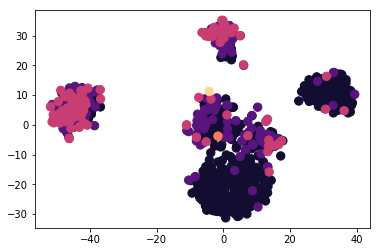

In [87]:
stat(clustre)

In [88]:
####################### idea2 #########################################

In [89]:
data_df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_71,gene_72,gene_73,gene_74,gene_75,gene_76,gene_77,gene_78,gene_79,gene_80
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,7.377931,4.511449,8.727812,0.000000,7.377931,5.574656,3.188164,10.685783,8.434069,10.825428
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.312113,4.516185,8.759459,0.587845,6.361812,1.813607,0.323658,9.698158,9.144467,10.377004
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,1.683023,1.306846,10.006130,0.452595,2.533663,3.403377,0.000000,10.924182,7.860553,8.392150
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,4.949633,2.058697,9.297597,3.184471,6.892998,4.847566,0.000000,10.265416,8.721417,10.381089
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.133921,4.056150,9.438910,1.831269,4.304657,4.104630,2.396187,8.063196,8.039462,9.519909


In [119]:
m =[]
m = data_df.max()

In [120]:
l = []
l = data_df.min()

In [130]:
th = (m-l)/2

In [131]:
len(original[0])

81

In [132]:
%%time

tot = []
for i in range(len(original)):
    point = []
    for j in range(len(original)):
        diff = np.absolute(original[j] - original[i])
        if np.sum(diff<=th) == len(original[j]) :
            point.append(j)
    tot.append(point)
    print("Point {} Done, clu = {}".format(i+1,len(point)))

Point 1 Done, clu = 84
Point 2 Done, clu = 21
Point 3 Done, clu = 42
Point 4 Done, clu = 71
Point 5 Done, clu = 134
Point 6 Done, clu = 29
Point 7 Done, clu = 3
Point 8 Done, clu = 17
Point 9 Done, clu = 1
Point 10 Done, clu = 54
Point 11 Done, clu = 124
Point 12 Done, clu = 60
Point 13 Done, clu = 27
Point 14 Done, clu = 41
Point 15 Done, clu = 54
Point 16 Done, clu = 100
Point 17 Done, clu = 32
Point 18 Done, clu = 25
Point 19 Done, clu = 73
Point 20 Done, clu = 115
Point 21 Done, clu = 12
Point 22 Done, clu = 3
Point 23 Done, clu = 9
Point 24 Done, clu = 13
Point 25 Done, clu = 19
Point 26 Done, clu = 80
Point 27 Done, clu = 25
Point 28 Done, clu = 73
Point 29 Done, clu = 32
Point 30 Done, clu = 1
Point 31 Done, clu = 78
Point 32 Done, clu = 33
Point 33 Done, clu = 41
Point 34 Done, clu = 66
Point 35 Done, clu = 23
Point 36 Done, clu = 43
Point 37 Done, clu = 1
Point 38 Done, clu = 9
Point 39 Done, clu = 50
Point 40 Done, clu = 67
Point 41 Done, clu = 47
Point 42 Done, clu = 102
Poi

Point 333 Done, clu = 20
Point 334 Done, clu = 149
Point 335 Done, clu = 39
Point 336 Done, clu = 5
Point 337 Done, clu = 1
Point 338 Done, clu = 48
Point 339 Done, clu = 3
Point 340 Done, clu = 18
Point 341 Done, clu = 112
Point 342 Done, clu = 68
Point 343 Done, clu = 3
Point 344 Done, clu = 1
Point 345 Done, clu = 10
Point 346 Done, clu = 49
Point 347 Done, clu = 145
Point 348 Done, clu = 49
Point 349 Done, clu = 100
Point 350 Done, clu = 58
Point 351 Done, clu = 53
Point 352 Done, clu = 69
Point 353 Done, clu = 93
Point 354 Done, clu = 8
Point 355 Done, clu = 24
Point 356 Done, clu = 1
Point 357 Done, clu = 2
Point 358 Done, clu = 50
Point 359 Done, clu = 102
Point 360 Done, clu = 58
Point 361 Done, clu = 1
Point 362 Done, clu = 20
Point 363 Done, clu = 1
Point 364 Done, clu = 42
Point 365 Done, clu = 20
Point 366 Done, clu = 143
Point 367 Done, clu = 55
Point 368 Done, clu = 90
Point 369 Done, clu = 162
Point 370 Done, clu = 67
Point 371 Done, clu = 31
Point 372 Done, clu = 22
Poi

Point 661 Done, clu = 78
Point 662 Done, clu = 109
Point 663 Done, clu = 17
Point 664 Done, clu = 56
Point 665 Done, clu = 146
Point 666 Done, clu = 25
Point 667 Done, clu = 1
Point 668 Done, clu = 38
Point 669 Done, clu = 96
Point 670 Done, clu = 44
Point 671 Done, clu = 2
Point 672 Done, clu = 101
Point 673 Done, clu = 133
Point 674 Done, clu = 89
Point 675 Done, clu = 105
Point 676 Done, clu = 4
Point 677 Done, clu = 52
Point 678 Done, clu = 173
Point 679 Done, clu = 50
Point 680 Done, clu = 12
Point 681 Done, clu = 9
Point 682 Done, clu = 77
Point 683 Done, clu = 31
Point 684 Done, clu = 20
Point 685 Done, clu = 106
Point 686 Done, clu = 1
Point 687 Done, clu = 18
Point 688 Done, clu = 92
Point 689 Done, clu = 2
Point 690 Done, clu = 5
Point 691 Done, clu = 103
Point 692 Done, clu = 21
Point 693 Done, clu = 1
Point 694 Done, clu = 9
Point 695 Done, clu = 11
Point 696 Done, clu = 217
Point 697 Done, clu = 96
Point 698 Done, clu = 37
Point 699 Done, clu = 12
Point 700 Done, clu = 2
P

In [134]:
test = tot

In [135]:
%%time

n = len(test) 
quickSort(test,0,n-1) 

CPU times: user 5.92 ms, sys: 671 µs, total: 6.59 ms
Wall time: 6.89 ms


In [136]:
test.reverse()

In [137]:
#extent of similarity between two sets

simi_th = 0.9

In [138]:
list2 = test

In [139]:
clu = []
clu.append(list2[0])
for i in range(1,len(list2)):
    clu_new = list2[i]
    common_elements = list(set().union(*clu) & set(clu_new))
    simi = len(common_elements)/len(clu_new)
    clu_nei = list(set(clu_new) - set(common_elements))
    if simi < simi_th :
        clu.append(clu_nei)
    else :
        clu[-1] = clu[-1] + clu_nei


In [140]:
len(clu)

61

In [141]:
tot_clu =[]

for i in range(len(clu)) :
    point_clu = []    
    for j in range(len(clu[i])):
        k=clu[i][j]
        point_clu.append(original[k])            
    tot_clu.append(point_clu)

In [142]:
kk = 0
for i in range(len(tot_clu)) :
    kk = kk + len(tot_clu[i])

In [143]:
kk

801

In [144]:
clu1 = tot_clu

In [145]:
n = len(clu1) 
quickSort(clu1,0,n-1) 

In [148]:
clu1.reverse()

In [149]:
print("<-------Top 10 cluster------->")
for i in range(5):
    print("Number of elements in cluster {} = {}".format(i+1,len(clu1[i])))

<-------Top 10 cluster------->
Number of elements in cluster 1 = 252
Number of elements in cluster 2 = 123
Number of elements in cluster 3 = 72
Number of elements in cluster 4 = 57
Number of elements in cluster 5 = 44


In [150]:
top = 5
dataset = []
target = []
for i in range(top):
    dataset = dataset + clu1[i]
    for j in range(len(clu1[i])):
        target.append(i)
    
    

In [151]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
points = tsne.fit_transform(dataset)

In [164]:
#################  TSNE Plot of algo1 predicted labels(n = 2)#######################

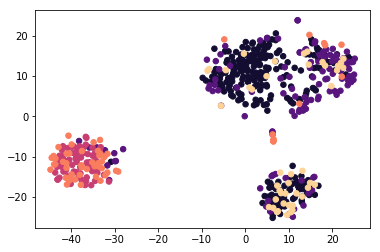

In [162]:
plt.scatter(x = points[:, 0], y = points[:, 1],
        c=target,
        cmap=ListedColormap(sns.color_palette('magma', n_colors=10).as_hex()),
        s=30)

In [153]:
top = 5
dataset = []
target = []
for i in range(top):
    dataset = dataset + clu1[i]
    for j in range(len(clu1[i])):
        target.append(i)

In [154]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

In [155]:
metrics.silhouette_score(dataset, target, metric='euclidean')

0.016160117859238838

In [156]:
import numpy as np
from sklearn.cluster import KMeans

In [159]:
kmeans_model = KMeans(n_clusters=10, random_state=1).fit(dataset)
labels = kmeans_model.labels_

In [160]:
metrics.silhouette_score(dataset, labels, metric='euclidean')


0.12273564343458157

In [165]:
#################  TSNE Plot of KMEANS predicted labels(alpha = 2)#######################

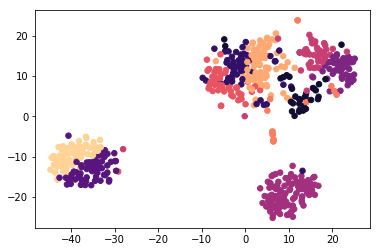

In [163]:
plt.scatter(x = points[:, 0], y = points[:, 1],
        c=kmeans_model.labels_,
        cmap=ListedColormap(sns.color_palette('magma', n_colors=10).as_hex()),
        s=30)